<a href="https://colab.research.google.com/github/andersonhsporto/Dados/blob/main/Cerveja-tukey/Cerveja_tukey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANOVA e teste de Tukey **

Análise de variância (ANOVA) e teste de média utilizando
o script sugerido por Ítalo Cegatta!

In [21]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(readr, dplyr, tibble, ggplot2, car, agricolae)

In [23]:
dados <- read_csv2("https://raw.githubusercontent.com/andersonhsporto/Dados/main/Dados%20Cerveja/Teste-1.csv")

dados

ℹ Using '\',\'' as decimal and '\'.\'' as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  Repeticao = col_double(),
  Tratamento = col_character(),
  Nota = col_double()
)




Repeticao,Tratamento,Nota
<dbl>,<chr>,<dbl>
1,T1,5
2,T1,3
3,T1,5
4,T1,5
5,T1,3
6,T1,5
7,T1,4
8,T1,5
9,T1,3


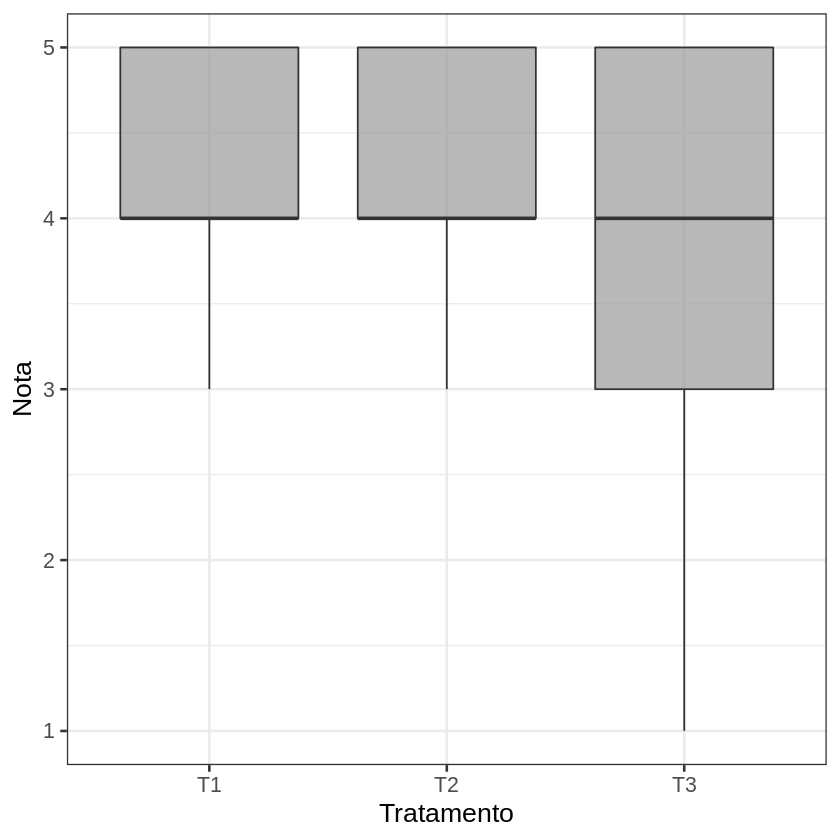

In [24]:
ggplot(dados, aes(Tratamento, Nota)) +
  geom_boxplot(fill = "grey60", alpha = 0.7) +
  theme_bw(16)

**Teste de Levene para verificar se há homogeneidade de variância**

"p-valor é menor que 5% (2,7%) ou seja não se assume a homogeneidade das variâncias."

In [25]:
leveneTest(Nota ~ factor(Tratamento), data=dados)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,3.75,0.02727126
,90,NA,NA


In [26]:
anova <-  aov(Nota ~ Tratamento, data=dados)

shapiro.test(resid(anova))


	Shapiro-Wilk normality test

data:  resid(anova)
W = 0.89813, p-value = 2.417e-06


In [27]:
summary(anova)

            Df Sum Sq Mean Sq F value Pr(>F)
Tratamento   2   2.67  1.3333     1.7  0.188
Residuals   90  70.58  0.7842               

In [14]:
tukey <- HSD.test(anova, "Tratamento")

tukey

$statistics
    MSerror Df     Mean       CV       MSD
  0.7842294 90 4.172043 21.22623 0.5360413

$parameters
   test     name.t ntr StudentizedRange alpha
  Tukey Tratamento   3         3.370214  0.05

$means
       Nota       std  r Min Max Q25 Q50 Q75
T1 4.258065 0.7288229 31   3   5   4   4   5
T2 4.322581 0.6525385 31   3   5   4   4   5
T3 3.935484 1.1813970 31   1   5   3   4   5

$comparison
NULL

$groups
       Nota groups
T2 4.322581      a
T1 4.258065      a
T3 3.935484      a

attr(,"class")
[1] "group"

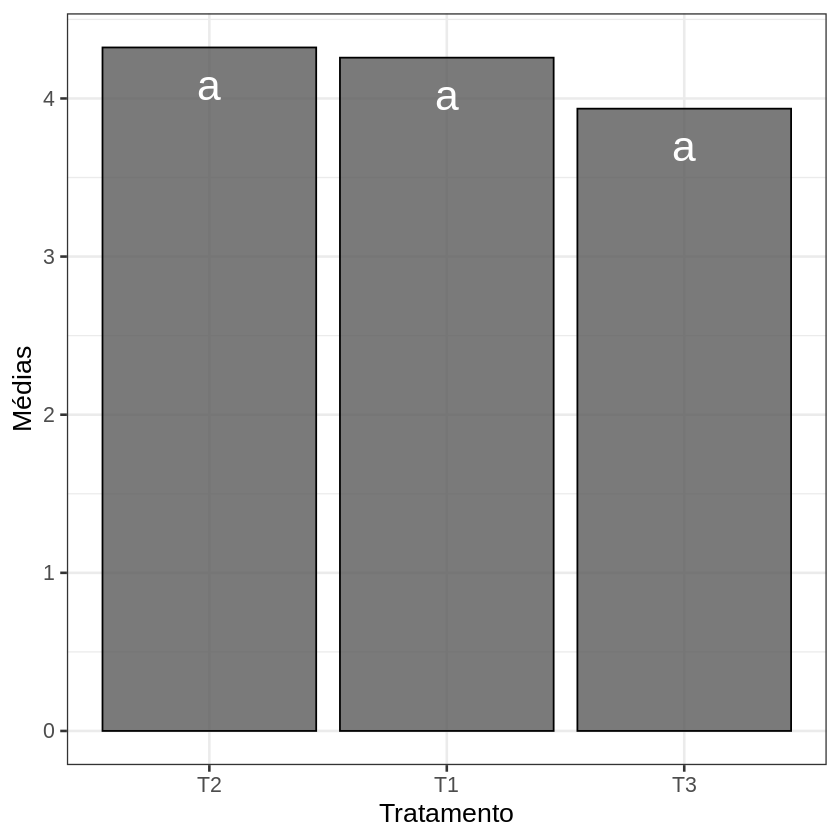

In [15]:
tukey$groups %>% 
  rownames_to_column(var = "trt") %>% 
  mutate(trt = reorder(trt, -Nota, mean)) %>% 
  ggplot(aes(trt, Nota)) +
    geom_col(alpha = 0.8, color = "black") +
    geom_text(aes(label = groups), vjust = 1.8, size = 9, color = "white") +
    labs(x = "Tratamento", y = "Médias") +
    theme_bw(16)

In [16]:
sessioninfo::session_info(c("readr", "dplyr", "tibble", "ggplot2", "car", "agricolae"))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


─ Session info ───────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.1.0 (2021-05-18)
 os       Ubuntu 18.04.5 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2021-07-07                  

─ Packages ───────────────────────────────────────────────────────────────────
 package       * version    date       lib source        
 abind           1.4-5      2016-07-21 [1] CRAN (R 4.1.0)
 agricolae     * 1.3-5      2021-06-06 [1] CRAN (R 4.1.0)
 AlgDesign       1.2.0      2019-11-29 [1] CRAN (R 4.1.0)
 backports       1.2.1      2020-12-09 [2] CRAN (R 4.0.3)
 base64enc       0.1-3      2015-07-28 [2] CRAN (R 4.0.0)
 BH              1.75.0-0   2021-01-11 [2] CRAN (R 4.0.3)
 boot            1.3-28     2021-05-03 [3] CR